# Coverage Guided Fuzzer

## SOEN 7481- Assignment 2

## Contributors

+ Prashanthi Ramesh - 40080517
+ Gagandeep Singh   - 40080644
+ Raghav Kaushal    - 40075268

### Github Link

+ https://github.com/PrashanthiRamesh/SOEN-7481-Assignment-2

### Smarter way to create fuzzed input for python program

#### Steps to create the fuzzer

1. We maintain a population (i.e., a list of seeds) that we use for mutation. Each seed in the population will be an input that provide additional coverage information.
2. We will take a seed from the population and fuzz the seed to test the program. If the population is empty, we mutate an initial seed that we provide manually.
3. We take the seed from the population semi-randomly, but the seeds that provided more additional coverage have a higher chance of being selected.
4. If the new input increased the coverage, we add this new input to the population as a new seed. We assign a score to the seed (i.e., how much coverage it improved).
5. We repeat and go back to Step 2 until we execute the fuzzer 100 times (i.e., your pre-defined number of trials).

#### Testing the fuzzer

+  We run our fuzzer on 3 Python programs
    - Differentiate network using Subnet
    - Credit Card Validation
    - RSA Encryption
    
+ Evaluate the programs on different fuzzing approaches:
    - Pure and/or Semi Randomly Fuzzing Approach
    - Mutation Fuzzing Approach
    - Coverage Guided Fuzzing Approach- smarter way to create fuzzed input

+ We discuss and compare each fuzzing approach in terms of coverage.
+ We discuss how the coverage changes for the inputs that we tried.
+ We also record any bug found in our program.

## References

1. https://github.com/geekcomputers/Python


# Program 1- Differentiate Network using Subnet

#### Description: 

+ This program calculates the network address, broadcast address, wildcard mask, number of host bits and number of hosts/subnet from the given IP address and subnet mask.

#### Input: The program takes 2 inputs- 

+ String- IP Address
+ String- Subnet mask

#### Output: 

+ Prints the calculated network address, broadcast address, wildcard mask, number of host bits and number of hosts/subnet.
+ If the given IP Address or Subnet mask is invalid, the program will end. 

#### Metrics:

+ SLOC- 69
+ Comments- 34
+ McCabe- 19

In [1]:
import random
import sys
def subnet_calc(ip_address, subnet_mask):

        #Checking IP address validity
    while True:

            #Checking octets            
        a = ip_address.split('.')

        if (len(a) == 4) and (1 <= int(a[0]) <= 223) and (int(a[0]) != 127) and (int(a[0]) != 169 or int(a[1]) != 254) and (0 <= int(a[1]) <= 255 and 0 <= int(a[2]) <= 255 and 0 <= int(a[3]) <= 255):
            break

        else:
            raise ValueError("Invalid IP Address")
            

    masks = [255, 254, 252, 248, 240, 224, 192, 128, 0]

        #Checking Subnet Mask validity
    while True:

            #Checking octets            
        b = subnet_mask.split('.')

        if (len(b) == 4) and (int(b[0]) == 255) and (int(b[1]) in masks) and (int(b[2]) in masks) and (int(b[3]) in masks) and (int(b[0]) >= int(b[1]) >= int(b[2]) >= int(b[3])):
            break

        else:
            raise ValueError("Invalid subnet Mask")

	############# Application #1 - Part #2 #############

        #Algorithm for subnet identification, based on IP and Subnet Mask

        #Convert mask to binary string
    mask_octets_padded = []
    mask_octets_decimal = subnet_mask.split(".")
        #print mask_octets_decimal

    for octet_index in range(0, len(mask_octets_decimal)):

            #print bin(int(mask_octets_decimal[octet_index]))

        binary_octet = bin(int(mask_octets_decimal[octet_index])).split("b")[1]
            #print binary_octet

        if len(binary_octet) == 8:
            mask_octets_padded.append(binary_octet)

        elif len(binary_octet) < 8:
            binary_octet_padded = binary_octet.zfill(8)
            mask_octets_padded.append(binary_octet_padded)

        #print mask_octets_padded

    decimal_mask = "".join(mask_octets_padded)
        #print decimal_mask   #Example: for 255.255.255.0 => 11111111111111111111111100000000

        #Counting host bits in the mask and calculating number of hosts/subnet
    no_of_zeros = decimal_mask.count("0")
    no_of_ones = 32 - no_of_zeros
    no_of_hosts = abs(2 ** no_of_zeros - 2) #return positive value for mask /32

        #print no_of_zeros
        #print no_of_ones
        #print no_of_hosts

        #Obtaining wildcard mask
    wildcard_octets = []
    for w_octet in mask_octets_decimal:
        wild_octet = 255 - int(w_octet)
        wildcard_octets.append(str(wild_octet))

        #print wildcard_octets

    wildcard_mask = ".".join(wildcard_octets)
        #print wildcard_mask

        ############# Application #1 - Part #3 #############

        #Convert IP to binary string
    ip_octets_padded = []
    ip_octets_decimal = ip_address.split(".")

    for octet_index in range(0, len(ip_octets_decimal)):

        binary_octet = bin(int(ip_octets_decimal[octet_index])).split("b")[1]

        if len(binary_octet) < 8:
            binary_octet_padded = binary_octet.zfill(8)
            ip_octets_padded.append(binary_octet_padded)

        else:
            ip_octets_padded.append(binary_octet)

        #print ip_octets_padded

    binary_ip = "".join(ip_octets_padded)

        #print binary_ip   #Example: for 192.168.2.100 => 11000000101010000000001001100100

        #Obtain the network address and broadcast address from the binary strings obtained above

    network_address_binary = binary_ip[:(no_of_ones)] + "0" * no_of_zeros
        #print network_address_binary

    broadcast_address_binary = binary_ip[:(no_of_ones)] + "1" * no_of_zeros
        #print broadcast_address_binary

    net_ip_octets = []
    for octet in range(0, len(network_address_binary), 8):
        net_ip_octet = network_address_binary[octet:octet+8]
        net_ip_octets.append(net_ip_octet)

        #print net_ip_octets

    net_ip_address = []
    for each_octet in net_ip_octets:
        net_ip_address.append(str(int(each_octet, 2)))

        #print net_ip_address

    network_address = ".".join(net_ip_address)
        #print network_address

    bst_ip_octets = []
    for octet in range(0, len(broadcast_address_binary), 8):
        bst_ip_octet = broadcast_address_binary[octet:octet+8]
        bst_ip_octets.append(bst_ip_octet)

        #print bst_ip_octets

    bst_ip_address = []
    for each_octet in bst_ip_octets:
        bst_ip_address.append(str(int(each_octet, 2)))

        #print bst_ip_address

    broadcast_address = ".".join(bst_ip_address)
        #print broadcast_address

        #Results for selected IP/mask
    print ("\n")
    print("Network address is: %s" % network_address)
    print("Broadcast address is: %s" % broadcast_address)
    print("Number of valid hosts per subnet: %s" % no_of_hosts)
    print("Wildcard mask: %s" % wildcard_mask)
    print("Mask bits: %s" % no_of_ones)
    
    return True



In [2]:
# Calling the function- program 1

subnet_calc("1.1.1.1", "255.255.255.0")



Network address is: 1.1.1.0
Broadcast address is: 1.1.1.255
Number of valid hosts per subnet: 254
Wildcard mask: 0.0.0.255
Mask bits: 24


True

In [3]:
def is_valid_ip_subnet(ip_address, subnet_mask):
    try:
        result = subnet_calc(ip_address, subnet_mask)
        return True
    except ValueError:
        return False

In [4]:
# calculate coverage for 2 inputs- program 1

from fuzzingbook.Coverage import Coverage

def calculate_coverage_2_input(input_population, function):
    all_coverage = set()
    with Coverage() as cov:
        try:
            function(input_population["ip"],input_population["subnet"])
        except:
            # we ignore exceptions for the purpose of this code, but some exceptions may be interesting
            pass
        # set union
    all_coverage |= cov.coverage()
    return len(all_coverage)

In [5]:
#calculate cumulatove coverage for 2 inputs- program 1

from fuzzingbook.Coverage import Coverage

def calculate_cumulative_coverage_2_input(input_population, function):
    cumulative_coverage = []
    all_coverage = set()
    
    for inp in input_population:
        with Coverage() as cov:
            try:
                function(inp["ip"],inp["subnet"])
            except:
                # we ignore exceptions for the purpose of this code, but some exceptions may be interesting
                pass
        # set union
        all_coverage |= cov.coverage()
        cumulative_coverage.append(len(all_coverage))
    return cumulative_coverage

## Random Fuzzer for Subnet Calculator

## Concept

+ IP version 4 has 32 bits. It is divided into 4 octets, where each octet consists of 8 bits. To make life easier for humans, these bits are converted into decimals. The bits can either be 0 or 1. So in an octet, it can start with 00000000 or 11111111 which when converted into decimals can be 0 or 255 respectively. The subnet mask helps us to identify the network of an IP. The subnet mask or the IP address cannot exceed 255 in one octet. IP version 4 has 5 classes and based on the classes, it's subnet mask is decided. This particular way of giving subnet mask is called FLSM (Fixed length subnet mask). 

    - Class A- 255.0.0.0
    - Class B- 255.255.0.0
    - Class C- 255.255.255.0

+ We also have VLSM (Variable length subnet mask). It was introduced to reduce the wasteage of IP. The decimal numbers 128, 192, 224, 240, 248, 252 and 254 are also valid if and only if it's previous octet is 255 and it's next octets/octet is 0. Thus the total number of inputs is 256^4 since it is 32 bits, which is approximately 4.9 Billion and the valid input is just 28. 

+ When we use random fuzzing method, we should have higher computation power to try 4.9 Billion trials and system will give output only for 28 trials. 
    
## Random Fuzzer Approach 1

+ When it comes to randomization, in our 1st approach we are going to randomize numbers in all 4 octets. We are planning to 1000 trials. In this case, the chance of getting a valid subnet mask is extremely low. 

## Random Fuzzer Approach 2

+ We are going to do 100 trials. So, instead of randomizing all the 4 octets we are going to first fix the 3rd and 4th octet as 0 and we are going to randomize only the 1st and 2nd octet. Thus, we will get atleast one desired output in 256 runs which is the maximum. 
+ Similarly we do it for the 2nd, 3rd and 4th octet. By this method, we can atleast have 1 desired output.

In [6]:
#1 Pure Randomly fuzzing Approach for IP address and Subnet mask

# generate random value in the range of 0 to 255

import random

def pure_random_ip_fuzz(int_start=0, int_range=1000):
    ip=""
    for i in range(0,4):
        ip+=str(random.randrange(int_start, int_start+int_range))
        if i!=3:
            ip+="."
    return ip

In [7]:
pure_random_ip_fuzz()

'600.22.371.822'

In [8]:
# frequency of valid inputs using random fuzzing for program 1

valid_inputs = []
trials = 100

for i in range(trials):
    input_ip = pure_random_ip_fuzz()
    input_subnet= pure_random_ip_fuzz()
    print ("input IP Address is " + input_ip)
    print("input Subet Mask is "+input_subnet+ "\n")
    if is_valid_ip_subnet(input_ip, input_subnet):
        valid_inputs.append({"ip":input_ip, "subnet":input_subnet}) 

print(valid_inputs)
len(valid_inputs) / trials

input IP Address is 53.88.666.615
input Subet Mask is 973.821.607.43

input IP Address is 582.957.763.719
input Subet Mask is 642.174.634.58

input IP Address is 259.474.155.65
input Subet Mask is 657.442.87.362

input IP Address is 951.175.446.492
input Subet Mask is 676.868.361.308

input IP Address is 384.426.946.165
input Subet Mask is 482.389.260.672

input IP Address is 725.40.472.452
input Subet Mask is 255.686.636.486

input IP Address is 139.908.812.252
input Subet Mask is 854.533.167.417

input IP Address is 223.140.961.530
input Subet Mask is 293.559.820.461

input IP Address is 674.937.321.794
input Subet Mask is 705.2.24.427

input IP Address is 338.168.842.882
input Subet Mask is 699.744.640.367

input IP Address is 621.961.384.635
input Subet Mask is 909.937.977.829

input IP Address is 547.339.361.98
input Subet Mask is 507.43.774.45

input IP Address is 277.287.754.547
input Subet Mask is 818.463.369.177

input IP Address is 781.824.83.950
input Subet Mask is 908.575.9

0.0

In [9]:
# Coverage for Random Fuzzer- Program 1

valid_inputs = []
trials = 100
cumulative_coverage=[]

for i in range(trials):
    seed={'ip':pure_random_ip_fuzz(), 'subnet':pure_random_ip_fuzz()}
    coverage=calculate_coverage_2_input(seed, is_valid_ip_subnet)
    #print(seed)
    cumulative_coverage.append(coverage)
    if is_valid_ip_subnet(input_ip, input_subnet):
        valid_inputs.append({"ip":input_ip, "subnet":input_subnet}) 

cumulative_coverage

[9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 14,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9]

Text(0, 0.5, 'lines covered')

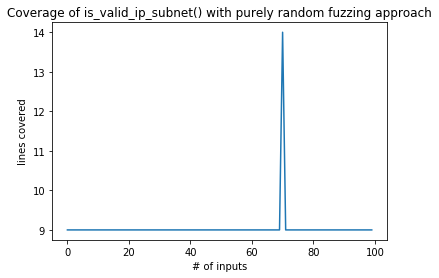

In [10]:
# Plot for pure random fuzzing approach- program 1

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(cumulative_coverage)
plt.title('Coverage of is_valid_ip_subnet() with purely random fuzzing approach')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')

### Result- IP will be valid while subnet mask is invalid

+ So in the next random approach, we will restructure the subnet mask fuzz algorithm

In [11]:
#2 Semi Randomly fuzzing approach for Subnet mask

# generate random value in the range of 0 to 255

def semi_random_ip_fuzz(int_start=0, int_range=256):
    ip=""
    for i in range(0,4):
        ip+=str(random.randrange(int_start, int_start+int_range))
        if i!=3:
            ip+="."
    return ip

def semi_random_subnet_fuzz(int_start=0, int_range=256):
    ip=""
    for i in range(0,2):
        ip+=str(random.randrange(int_start, int_start+int_range))
        ip+="."
    ip+="0.0"
    return ip

In [12]:
semi_random_subnet_fuzz()

'78.222.0.0'

In [13]:
# frequency of valid inputs using semi random fuzzing appraoch- program 1

valid_inputs = []
# trials= 1000 will give better results
trials = 100

for i in range(trials):
    input_ip = semi_random_ip_fuzz()
    input_subnet= semi_random_subnet_fuzz()
    print ("input IP Address is " + input_ip)
    print("input Subet Mask is "+input_subnet+ "\n")
    if is_valid_ip_subnet(input_ip, input_subnet):
        valid_inputs.append({"ip":input_ip, "subnet":input_subnet}) 

print(valid_inputs)
len(valid_inputs) / trials

input IP Address is 72.7.78.53
input Subet Mask is 141.9.0.0

input IP Address is 248.66.158.206
input Subet Mask is 61.130.0.0

input IP Address is 6.159.17.180
input Subet Mask is 4.111.0.0

input IP Address is 250.242.132.222
input Subet Mask is 143.73.0.0

input IP Address is 122.44.22.65
input Subet Mask is 22.100.0.0

input IP Address is 246.164.174.86
input Subet Mask is 36.187.0.0

input IP Address is 155.235.102.21
input Subet Mask is 46.175.0.0

input IP Address is 234.89.42.186
input Subet Mask is 163.8.0.0

input IP Address is 201.190.138.187
input Subet Mask is 173.19.0.0

input IP Address is 135.64.122.35
input Subet Mask is 95.99.0.0

input IP Address is 189.80.192.32
input Subet Mask is 106.239.0.0

input IP Address is 63.237.214.163
input Subet Mask is 15.246.0.0

input IP Address is 154.126.36.99
input Subet Mask is 139.212.0.0

input IP Address is 24.7.88.34
input Subet Mask is 195.31.0.0

input IP Address is 70.246.32.136
input Subet Mask is 175.131.0.0

input IP Ad

0.0

+ pure random fuzzer- ip address might be valid but subnet mask will be invalid for the 1000 trials. Even if we increase the trials 10 times, it will not make any difference.
+ semi random fuzzer- ip address will be valid all the time and we are going to set the 3rd and 4th octet to 0 and randomize 1st and 2nd octet between 0 to 255. With 1000 trials, the probability of getting a valid subnet mask is very low but we can get . If we increase the trials to 10000, we have a better chance of finding a valid subnet mask. 

In [14]:
# Coverage for Semi Random Fuzzer- Program 1

valid_inputs = []
trials = 100
cumulative_coverage=[]

for i in range(trials):
    seed={'ip':semi_random_ip_fuzz(), 'subnet':semi_random_subnet_fuzz()}
    coverage=calculate_coverage_2_input(seed, is_valid_ip_subnet)
    #print(seed)
    cumulative_coverage.append(coverage)
    if is_valid_ip_subnet(input_ip, input_subnet):
        valid_inputs.append({"ip":input_ip, "subnet":input_subnet}) 

cumulative_coverage

[14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 9,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 9,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 14]

Text(0, 0.5, 'lines covered')

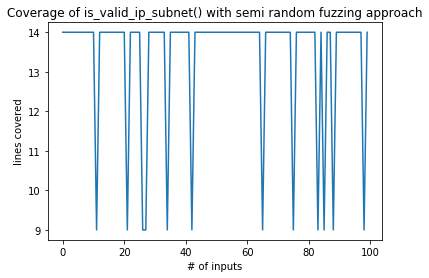

In [15]:
# Plot for semi random fuzzing approach- program 1

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(cumulative_coverage)
plt.title('Coverage of is_valid_ip_subnet() with semi random fuzzing approach')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')

## Mutation Fuzzer for Subnet Calculator

In [16]:
# mutator fuzzing approach for IP and Subnet

class Network_Fuzzer:
    def ip_add(s):
        octets= s.split(".")
        # choose a random octet
        octet = random.randint(0, len(octets) - 1)
        #choose a random position
        pos= random.randint(0,len(octets[octet])-1)
        random_integer = str(random.randrange(0, 10)) # changed the char to integer from 0 to 255
        octets[octet]=octets[octet][:pos] + random_integer + octets[octet][pos:]
        return ".".join(octets)
    
    def ip_remove(s):
        octets= s.split(".")
        # choose a random octet
        octet = random.randint(0, len(octets) - 1)
        #choose a random position
        pos= random.randint(0,len(octets[octet])-1)
        # remove value at pos
        octets[octet]=octets[octet][:pos] + octets[octet][pos+1:]
        return ".".join(octets)
    
    def ip_flip(s):
        octets= s.split(".")
        # choose a random octet
        octet = random.randint(0, len(octets) - 1)
        #convert to binary
        binary_octet='{0:08b}'.format(int(octets[octet]))
        #flip a random bit
        pos=random.randint(0,len(binary_octet)-1)
        flipped_bit=str(1- int(binary_octet[pos]))
        binary_octet=binary_octet[:pos] + flipped_bit + binary_octet[pos + 1:]
        octets[octet]= int(binary_octet,2)
        return ".".join(map(str, octets))
        
    def fuzz_ip(s):
        mutators = [Network_Fuzzer.ip_add, Network_Fuzzer.ip_remove, Network_Fuzzer.ip_flip]
        mutator = mutators[random.randint(0, 2)]
        return mutator(s)

        

In [17]:
# Network_Fuzzer.ip_add("127.0.0.1")
# Network_Fuzzer.ip_remove("127.0.0.1")
Network_Fuzzer.ip_flip("127.0.0.1")


'127.0.0.0'

In [18]:
# frequency of valid inputs using mutation fuzzing approach- program 1

valid_inputs = []
trials = 100

for i in range(trials):
    input_ip = Network_Fuzzer.fuzz_ip("182.168.100.124")
    input_subnet= Network_Fuzzer.fuzz_ip("255.255.0.0")
    print ("input IP Address is " + input_ip)
    print("input Subet Mask is "+input_subnet+ "\n")
    if is_valid_ip_subnet(input_ip, input_subnet):
        valid_inputs.append({"ip":input_ip, "subnet":input_subnet}) 

print(valid_inputs)
len(valid_inputs) / trials

input IP Address is 54.168.100.124
input Subet Mask is 255.7255.0.0

input IP Address is 182.168.100.126
input Subet Mask is 255.255.0.64

input IP Address is 182.16.100.124
input Subet Mask is 255.255.64.0

input IP Address is 182.168.100.60
input Subet Mask is 255.255..0

input IP Address is 182.168.100.116
input Subet Mask is 255.255.4.0

input IP Address is 182.168.100.24
input Subet Mask is 2755.255.0.0

input IP Address is 182.168.108.124
input Subet Mask is 255.254.0.0



Network address is: 182.168.0.0
Broadcast address is: 182.169.255.255
Number of valid hosts per subnet: 131070
Wildcard mask: 0.1.255.255
Mask bits: 15
input IP Address is 182.168.100.1824
input Subet Mask is 6255.255.0.0

input IP Address is 182.168.10.124
input Subet Mask is 191.255.0.0

input IP Address is 1862.168.100.124
input Subet Mask is 255.255.0.00

input IP Address is 182.1568.100.124
input Subet Mask is 255.255.0.8

input IP Address is 12.168.100.124
input Subet Mask is 255.2155.0.0

input IP Addres

0.02

In [19]:
# Coverage for Mutation Fuzzer- Program 1

valid_inputs = []
trials = 100
cumulative_coverage=[]

for i in range(trials):
    seed={'ip':Network_Fuzzer.fuzz_ip("182.168.100.124"), 'subnet':Network_Fuzzer.fuzz_ip("255.255.0.0")}
    coverage=calculate_coverage_2_input(seed, is_valid_ip_subnet)
    #print(seed)
    cumulative_coverage.append(coverage)
    if is_valid_ip_subnet(input_ip, input_subnet):
        valid_inputs.append({"ip":input_ip, "subnet":input_subnet}) 

cumulative_coverage



Network address is: 166.168.0.0
Broadcast address is: 166.169.255.255
Number of valid hosts per subnet: 131070
Wildcard mask: 0.1.255.255
Mask bits: 15


Network address is: 166.168.0.0
Broadcast address is: 166.169.255.255
Number of valid hosts per subnet: 131070
Wildcard mask: 0.1.255.255
Mask bits: 15


Network address is: 166.168.0.0
Broadcast address is: 166.169.255.255
Number of valid hosts per subnet: 131070
Wildcard mask: 0.1.255.255
Mask bits: 15


Network address is: 166.168.0.0
Broadcast address is: 166.169.255.255
Number of valid hosts per subnet: 131070
Wildcard mask: 0.1.255.255
Mask bits: 15


Network address is: 166.168.0.0
Broadcast address is: 166.169.255.255
Number of valid hosts per subnet: 131070
Wildcard mask: 0.1.255.255
Mask bits: 15


Network address is: 166.168.0.0
Broadcast address is: 166.169.255.255
Number of valid hosts per subnet: 131070
Wildcard mask: 0.1.255.255
Mask bits: 15


Network address is: 166.168.0.0
Broadcast address is: 166.169.255.255
Numb


Network address is: 166.168.0.0
Broadcast address is: 166.169.255.255
Number of valid hosts per subnet: 131070
Wildcard mask: 0.1.255.255
Mask bits: 15


Network address is: 166.168.0.0
Broadcast address is: 166.169.255.255
Number of valid hosts per subnet: 131070
Wildcard mask: 0.1.255.255
Mask bits: 15


Network address is: 166.168.0.0
Broadcast address is: 166.169.255.255
Number of valid hosts per subnet: 131070
Wildcard mask: 0.1.255.255
Mask bits: 15


Network address is: 166.168.0.0
Broadcast address is: 166.169.255.255
Number of valid hosts per subnet: 131070
Wildcard mask: 0.1.255.255
Mask bits: 15


Network address is: 166.168.0.0
Broadcast address is: 166.169.255.255
Number of valid hosts per subnet: 131070
Wildcard mask: 0.1.255.255
Mask bits: 15


Network address is: 166.168.0.0
Broadcast address is: 166.169.255.255
Number of valid hosts per subnet: 131070
Wildcard mask: 0.1.255.255
Mask bits: 15


Network address is: 166.168.0.0
Broadcast address is: 166.169.255.255
Numbe

[14,
 14,
 14,
 9,
 9,
 13,
 9,
 14,
 9,
 9,
 9,
 14,
 13,
 14,
 14,
 9,
 9,
 14,
 9,
 14,
 14,
 9,
 14,
 9,
 9,
 9,
 13,
 14,
 14,
 14,
 14,
 14,
 13,
 9,
 9,
 14,
 14,
 9,
 14,
 9,
 9,
 14,
 14,
 9,
 9,
 14,
 9,
 14,
 14,
 9,
 13,
 13,
 13,
 14,
 14,
 13,
 9,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 14,
 13,
 14,
 9,
 14,
 14,
 9,
 14,
 9,
 14,
 9,
 14,
 14,
 13,
 9,
 9,
 14,
 14,
 14,
 14,
 9,
 13,
 9,
 14,
 14,
 14,
 9,
 9,
 14,
 14,
 14,
 9,
 9]

Text(0, 0.5, 'lines covered')

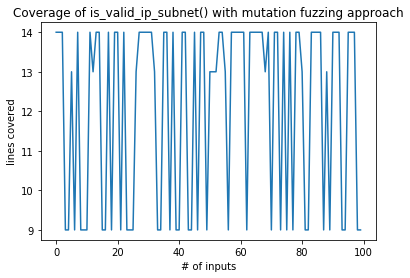

In [20]:

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(cumulative_coverage)
plt.title('Coverage of is_valid_ip_subnet() with mutation fuzzing approach')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')

## Smart Coverage Guided Fuzzer for Subnet Calculator

In [21]:
from fuzzingbook.Coverage import Coverage

input_ip = Network_Fuzzer.fuzz_ip("192.168.32.44")
input_subnet= Network_Fuzzer.fuzz_ip("255.255.255.0")

with Coverage() as cov:
    is_valid_ip_subnet(input_ip, input_subnet)
    
[c for c in cov.coverage()]

[('is_valid_ip_subnet', 6),
 ('is_valid_ip_subnet', 5),
 ('subnet_calc', 9),
 ('subnet_calc', 15),
 ('subnet_calc', 6),
 ('is_valid_ip_subnet', 3),
 ('__exit__', 237),
 ('is_valid_ip_subnet', 2),
 ('subnet_calc', 11)]

In [22]:
seed = {'ip':Network_Fuzzer.fuzz_ip("182.168.100.124"), "subnet": Network_Fuzzer.fuzz_ip("255.255.255.128")}
calculate_coverage_2_input(seed, is_valid_ip_subnet)

14

In [23]:
trials = 100

#[{'input':{'ip':'','subnet':''},'coverage':''}
cumulative_coverage = []
seed = {'ip':Network_Fuzzer.fuzz_ip("182.168.100.124"), "subnet": Network_Fuzzer.fuzz_ip("255.255.255.0")}
population= []
max_coverage=0
for i in range(0, trials):
    coverage=calculate_coverage_2_input(seed, is_valid_ip_subnet)
    #print(seed)
    cumulative_coverage.append(coverage)
    if coverage>max_coverage:
        population.append({'input':seed, 'coverage':coverage})
        max_coverage=coverage
    #check if population is not empty 
    if population:
        #select seed semi randomly- sort and if equal coverage, then select random
        population= sorted(population, key = lambda i: i['coverage'], reverse=True)
        #get all seeds from population with highest coverage
        high_coverage_seeds=population[0]
        if len(population)>1 : 
            new_pop=[d for d in population if d['coverage']==high_coverage_seeds['coverage']]
            #choose random from dic and add to seed
            rand_pop=random.randint(0, len(new_pop) - 1)
            seed={'ip':Network_Fuzzer.fuzz_ip(new_pop[rand_pop]['input']['ip']), "subnet": Network_Fuzzer.fuzz_ip(new_pop[rand_pop]['input']['subnet'])} 
        else:
            seed={'ip':Network_Fuzzer.fuzz_ip(population[0]['input']['ip']), "subnet": Network_Fuzzer.fuzz_ip(population[0]['input']['subnet'])} 
print(population)
cumulative_coverage
                

[{'input': {'ip': '182.168.100.124', 'subnet': '255.2525.255.64'}, 'coverage': 14}, {'input': {'ip': '182.168.1070.124', 'subnet': '255.2525.255.0'}, 'coverage': 9}]


[9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 14,
 14,
 14,
 14,
 9,
 14,
 9,
 14,
 9,
 9,
 9,
 9,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 9,
 9,
 14,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 9,
 9,
 14,
 9,
 9,
 14,
 9,
 9,
 14,
 9,
 14,
 14,
 9,
 14,
 9,
 14,
 9,
 14,
 9,
 14,
 14,
 14,
 14,
 9,
 9,
 9,
 14,
 9,
 9,
 14,
 9,
 9,
 9,
 14,
 9,
 14,
 14,
 9,
 14,
 9,
 14]

Text(0, 0.5, 'lines covered')

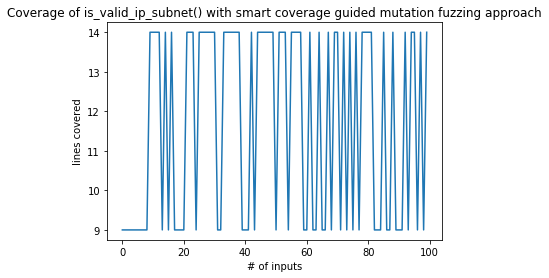

In [24]:
# Plot for smart coverage guided approach- Program 1

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(cumulative_coverage)
plt.title('Coverage of is_valid_ip_subnet() with smart coverage guided mutation fuzzing approach')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')

## Program 1- Comparison of different fuzzing approaches

###### We have Calculated code coverage using Random Fuzzer Approach1 ,Random Fuzzer Approach 2 , Mutation Fuzzer and Coverage Guided Smart fuzzer.

1. The graph plot which we have shown for the Random Fuzzer Approach1 the code coverage is quite constant for each input and the code coverage is quite less in this case.

2. For Random Fuzzer Approach 2 we were able to improve our code coverage in comparision to Random Fuzzer Approach2.

3. To have better code coverage we have implemented the mutation fuzzer for our program and result from the graph shows us that there is a lot of improvement in terms of code coverage using this particular approach.

4. Coverage Guided Smart Fuzzer is our final method on which we have tested our current program and after testing our program with the inputs we can conclude that this fuzzer gives us better result in comparision to above three fuzzers which we have implemented.


# Program 2-  Credit Card Validator

#### Description: 

+ This program prompts the user to enter a credit card number as an integer and Display whether that card is valid or invalid.

+ Credit card numbers follow certain patterns.
    + A credit card number must have between 13 and 16 digits. It must start with:

        + 4 for Visa cards
        + 5 for Master cards
        + 37 for American Express cards
        + 6 for Discover cards and so on.

+ The problem is solved by using Luhn algorithm.

#### Input: The program takes 1 input- 

+ This program prompts the user to enter a credit card number as an integer

#### Output: 

+ Display whether that card is valid or invalid

#### Metrics:

+ SLOC- 59
+ Comments- 5
+ McCabe- 18

In [25]:
# luhn algorithm


class CreditCard:
    def __init__(self, card_no):
        self.card_no = card_no

    @property
    def company(self):
        comp = ""
        if str(self.card_no).startswith('4'):
            comp = 'Visa Card'
        elif str(self.card_no).startswith(('50', '67', '58', '63',)):
            comp = 'Maestro Card'
        elif str(self.card_no).startswith('5'):
            comp = 'Master Card'
        elif str(self.card_no).startswith('37'):
            comp = 'American Express Card'
        elif str(self.card_no).startswith('62'):
            comp = 'Unionpay Card'
        elif str(self.card_no).startswith('6'):
            comp = 'Discover Card'
        elif str(self.card_no).startswith('35'):
            comp = 'JCB Card'
        elif str(self.card_no).startswith('7'):
            comp = 'Gasoline Card'
        return comp

    def first_check(self):
        card_number= [int(i) for i in str(self.card_no)]     # added this line of code to handle len(int) exception
        #if 13 <= len(self.card_no) <= 19:
        if 13 <= len(card_number) <= 19:
            message = "First check : Valid in terms of length."

        else:
            message = "First check : Check Card number once again it must be of 13 or 16 digits long."
        return message

    def validate(self):
        # double every second digit from right to left
        sum_ = 0
        card_number= [int(i) for i in str(self.card_no)]
        #crd_no = self.card_no[::-1]
        crd_no = card_number[::-1]
        for i in range(len(crd_no)):
            if i % 2 == 1:
                double_it = int(crd_no[i]) * 2

                if len(str(double_it)) == 2:
                    sum_ += sum([eval(i) for i in str(double_it)])

                else:
                    sum_ += double_it

            else:
                sum_ += int(crd_no[i])

        if sum_ % 10 == 0:
            response = "Valid Card"
        else:
            response = 'Invalid Card'

        return response

    @property
    def checksum(self):
        card_number= [int(i) for i in str(self.card_no)]
        return '#CHECKSUM# : ' + str(card_number[-1])

    @classmethod
    def set_card(cls, card_to_check):
        return cls(card_to_check)


def credit_card_validator(card_number):
    card = CreditCard.set_card(card_number)
    if not card.company:
        return False
    print('Company: ',card.company)
    print('Card : ', card.card_no)
    print(card.first_check())
    print(card.checksum)
    print(card.validate())
    return True


# 79927398713
# 4388576018402626
# 379354508162306


In [26]:
credit_card_validator(379354508162306)

Company:  American Express Card
Card :  379354508162306
First check : Valid in terms of length.
#CHECKSUM# : 6
Valid Card


True

In [27]:
credit_card_validator(1234)

False

### Errors Encountered:

1. The input provided for the credit_card_validator() is 1234 and the first input from random fuzzer, which encounters an exception at line 23 as the input value does not validate true to any condition provided and comp value is None. Hence, the exception is thrown saying that string and none type cannot be concatenated. We modify the program accordingly.

###### Exception not handled for the input 1234 and trace is given below

TypeError                                 Traceback (most recent call last)
<ipython-input-3-b5199e87e50f> in <module>
----> 1 credit_card_validator(1234)

<ipython-input-2-6ba12240553f> in credit_card_validator(card_number)
     71 def credit_card_validator(card_number):
     72     card = CreditCard.set_card(card_number)
---> 73     print(card.company)
     74     print('Card : ', card.card_no)
     75     print(card.first_check())

<ipython-input-2-6ba12240553f> in company(self)
     26             comp = 'Gasoline Card'
     27 
---> 28         return 'Company : ' + comp
     29 
     30     def first_check(self):

TypeError: can only concatenate str (not "NoneType") to str

------------------------------------------------------------------------------------------------------------------------------

2. The input provided for the credit_card_validator() is 79927398713, which encounters an exception at line 32 and 44 because the program is trying to call a method on an int type of a variable. This would work if it would have called len() function on a list type of a variable. We modify the program accordingly

###### Exception not handled for len(int) and trace is given below

TypeError                                 Traceback (most recent call last)
<ipython-input-21-3c8761c89add> in <module>
----> 1 credit_card_validator(79927398713)

<ipython-input-20-d6f2ff88e21e> in credit_card_validator(card_number)
     76     print(card.company)
     77     print('Card : ', card.card_no)
---> 78     print(card.first_check())
     79     print(card.checksum)
     80     print(card.validate())

<ipython-input-20-d6f2ff88e21e> in first_check(self)
     30     def first_check(self):
     31         #card_number= [int(i) for i in str(self.card_no)]
---> 32         if 13 <= len(self.card_no) <= 19:
     33             message = "First check : Valid in terms of length."
     34 

TypeError: object of type 'int' has no len()

-----------------------------------------------------------------------------------------------------------------------------

3. The input provided for the credit_card_validator() is 79927398713, which encounters an exception at line 68 as the program tries to subscript a list and not an integer. We modify the program accordingly. 

###### Exception not handled for 'int' object is not subscriptable

TypeError                                 Traceback (most recent call last)
<ipython-input-28-3c8761c89add> in <module>
----> 1 credit_card_validator(79927398713)

<ipython-input-27-b93e4421e5cc> in credit_card_validator(card_number)
     78     print('Card : ', card.card_no)
     79     print(card.first_check())
---> 80     print(card.checksum)
     81     print(card.validate())
     82 

<ipython-input-27-b93e4421e5cc> in checksum(self)
     66     def checksum(self):
     67         #card_number= [int(i) for i in str(self.card_no)]
---> 68         return '#CHECKSUM# : ' + str(self.card_no[-1])
     69 
     70     @classmethod

TypeError: 'int' object is not subscriptable


TypeError                                 Traceback (most recent call last)
<ipython-input-32-3c8761c89add> in <module>
----> 1 credit_card_validator(79927398713)

<ipython-input-31-468b39fc569f> in credit_card_validator(card_number)
     79     print(card.first_check())
     80     print(card.checksum)
---> 81     print(card.validate())
     82 
     83 # 79927398713

<ipython-input-31-468b39fc569f> in validate(self)
     42         sum_ = 0
     43       #  card_number= [int(i) for i in str(self.card_no)]
---> 44         crd_no = self.card_no[::-1]
     45         for i in range(len(crd_no)):
     46             if i % 2 == 1:

TypeError: 'int' object is not subscriptable


In [28]:
from fuzzingbook.Coverage import Coverage

def calculate_cumulative_coverage_1_input(input_population, function):
    cumulative_coverage = []
    all_coverage = set()
    
    for inp in input_population:
        with Coverage() as cov:
            try:
                function(inp)
            except:
                # we ignore exceptions for the purpose of this code, but some exceptions may be interesting
                pass
        # set union
        all_coverage |= cov.coverage()
        cumulative_coverage.append(len(all_coverage))
    return cumulative_coverage

In [29]:
from fuzzingbook.Coverage import Coverage

def calculate_coverage_1_input(input_population, function):
    all_coverage = set()
    with Coverage() as cov:
        try:
            function(input_population)
        except:
            # we ignore exceptions for the purpose of this code, but some exceptions may be interesting
            pass
        # set union
    all_coverage |= cov.coverage()
    return len(all_coverage)

## Random Fuzzer for Credit Card Validator


In [30]:
#1 Pure Randomly fuzzing Approach for Credit Card Number

# generate random value in the range of 0 to 100000000000000000000

def pure_random_credit_card_fuzz(int_start=0, int_range=100000000000000000000):
    credit_card=""
    credit_card=str(random.randint(int_start, int_range))    
    return credit_card


In [31]:
pure_random_credit_card_fuzz()

'48210973578474038864'

In [32]:
# frequency of valid inputs using random fuzzing approach- Program 2

valid_inputs = []
trials = 100

for i in range(trials):
    input_credit_card_number = pure_random_credit_card_fuzz()
    print ("Input Credit Card Number is " + input_credit_card_number)
    if credit_card_validator(input_credit_card_number):
        valid_inputs.append(input_credit_card_number) 

print(valid_inputs)
len(valid_inputs) / trials

Input Credit Card Number is 24327949656339812196
Input Credit Card Number is 66000501464259919838
Company:  Discover Card
Card :  66000501464259919838
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 8
Valid Card
Input Credit Card Number is 41205722440937306275
Company:  Visa Card
Card :  41205722440937306275
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 5
Invalid Card
Input Credit Card Number is 52956958193728508503
Company:  Master Card
Card :  52956958193728508503
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 3
Valid Card
Input Credit Card Number is 3291726299488228827
Input Credit Card Number is 54809272651566047325
Company:  Master Card
Card :  54809272651566047325
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 5
Invalid Card
Input Credit Card Number is 94735000384585033587
Input Credit Card Number is 84

0.49

In [33]:
# Coverage for random fuzzing approach- Program 2

valid_inputs = []
trials = 100
cumulative_coverage=[]

for i in range(trials):
    input_credit_card_number = pure_random_credit_card_fuzz()
    coverage=calculate_coverage_1_input(input_credit_card_number, credit_card_validator)
    cumulative_coverage.append(coverage)
    if credit_card_validator(input_credit_card_number):
        valid_inputs.append(input_credit_card_number)

cumulative_coverage

Company:  Master Card
Card :  5158526865878172066
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Company:  Master Card
Card :  5158526865878172066
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Company:  Visa Card
Card :  49913505449350508820
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 0
Invalid Card
Company:  Visa Card
Card :  49913505449350508820
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 0
Invalid Card
Company:  Unionpay Card
Card :  62645791524123141260
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 0
Invalid Card
Company:  Unionpay Card
Card :  62645791524123141260
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 0
Invalid Card
Company:  Maestro Card
Card :  58518410224661818942
First check : Check Card number once again it must be of 13 or 16 digits long.
#

#CHECKSUM# : 1
Invalid Card
Company:  Visa Card
Card :  41325515728226588011
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 1
Invalid Card


[71,
 66,
 70,
 67,
 16,
 16,
 16,
 16,
 72,
 16,
 16,
 16,
 67,
 71,
 16,
 69,
 16,
 66,
 68,
 16,
 66,
 67,
 16,
 73,
 74,
 68,
 16,
 16,
 67,
 16,
 16,
 71,
 16,
 73,
 16,
 16,
 66,
 16,
 16,
 66,
 66,
 16,
 16,
 70,
 71,
 68,
 16,
 73,
 67,
 16,
 67,
 66,
 16,
 68,
 71,
 67,
 16,
 73,
 16,
 16,
 73,
 16,
 16,
 16,
 66,
 16,
 73,
 16,
 66,
 16,
 67,
 16,
 73,
 73,
 16,
 16,
 16,
 70,
 73,
 16,
 68,
 16,
 16,
 16,
 68,
 16,
 16,
 67,
 16,
 66,
 73,
 66,
 16,
 73,
 73,
 16,
 68,
 16,
 16,
 69]

Text(0, 0.5, 'lines covered')

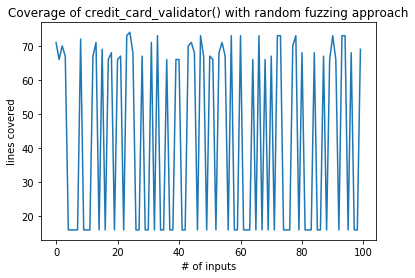

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(cumulative_coverage)
plt.title('Coverage of credit_card_validator() with random fuzzing approach')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')

## Mutation Fuzzer for Credit Card Validator

In [35]:
class Credit_Card_Fuzzer:
    def add(s):
        #choose a random position
        pos= random.randint(0,len(s)-1)
        random_integer = str(random.randrange(0, 10)) # changed the char to integer from 0 to 255
        s=s[:pos] + random_integer + s[pos:]
        return int(s)
    
    def remove(s):
        #choose a random position
        pos= random.randint(0,len(s)-1)
        # remove value at pos
        s=s[:pos] + s[pos+1:]
        return s
    
    def flip(s):
        #convert to binary
        binary='{0:08b}'.format(int(s))
        #flip a random bit
        pos=random.randint(0,len(binary)-1)
        flipped_bit=str(1- int(binary[pos]))
        binary=binary[:pos] + flipped_bit + binary[pos + 1:]
        s= int(binary,2)
        return s
        
    def fuzz_credit_card(s):
        mutators = [Credit_Card_Fuzzer.add, Credit_Card_Fuzzer.remove, Credit_Card_Fuzzer.flip]
        mutator = mutators[random.randint(0, 2)]
        return mutator(s)

In [36]:
# frequency of valid inputs using mutation fuzzing approach

valid_inputs = []
trials = 100

for i in range(trials):
    input_credit_card_number = Credit_Card_Fuzzer.fuzz_credit_card("1234")
    print("Input Credit Card Number is "+str(input_credit_card_number)+ "\n")
    if credit_card_validator(input_credit_card_number):
        valid_inputs.append(input_credit_card_number) 

print(valid_inputs)
len(valid_inputs) / trials

Input Credit Card Number is 31234

Input Credit Card Number is 123

Input Credit Card Number is 12834

Input Credit Card Number is 124

Input Credit Card Number is 1170

Input Credit Card Number is 12334

Input Credit Card Number is 1106

Input Credit Card Number is 1234

Input Credit Card Number is 124

Input Credit Card Number is 1218

Input Credit Card Number is 12314

Input Credit Card Number is 1106

Input Credit Card Number is 1106

Input Credit Card Number is 124

Input Credit Card Number is 1170

Input Credit Card Number is 1238

Input Credit Card Number is 124

Input Credit Card Number is 1235

Input Credit Card Number is 1234

Input Credit Card Number is 1106

Input Credit Card Number is 11234

Input Credit Card Number is 134

Input Credit Card Number is 124

Input Credit Card Number is 12364

Input Credit Card Number is 123

Input Credit Card Number is 234

Input Credit Card Number is 134

Input Credit Card Number is 1242

Input Credit Card Number is 134

Input Credit Card N

0.01

In [37]:
# Coverage for mutation fuzzing approach- Program 2

valid_inputs = []
trials = 100
cumulative_coverage=[]

for i in range(trials):
    input_credit_card_number = Credit_Card_Fuzzer.fuzz_credit_card("1234")
    coverage=calculate_coverage_1_input(input_credit_card_number, credit_card_validator)
    cumulative_coverage.append(coverage)
    if credit_card_validator(input_credit_card_number):
        valid_inputs.append(input_credit_card_number)

cumulative_coverage

Company:  Gasoline Card
Card :  71234
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 4
Invalid Card
Company:  Gasoline Card
Card :  71234
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 4
Invalid Card
Company:  Discover Card
Card :  61234
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 4
Valid Card
Company:  Discover Card
Card :  61234
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 4
Valid Card
Company:  Master Card
Card :  51234
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 4
Invalid Card
Company:  Master Card
Card :  51234
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 4
Invalid Card
Company:  Gasoline Card
Card :  71234
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 4
Invali

[16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 73,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 68,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 65,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 70,
 16,
 16,
 16,
 16,
 16]

Text(0, 0.5, 'lines covered')

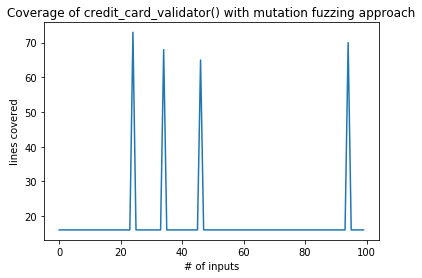

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(cumulative_coverage)
plt.title('Coverage of credit_card_validator() with mutation fuzzing approach')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')

## Smart Coverage Guided Fuzzer for Credit Card Validator

In [39]:
from fuzzingbook.Coverage import Coverage

input_credit_card_number = Credit_Card_Fuzzer.fuzz_credit_card("4388576012626")

with Coverage() as cov:
    credit_card_validator(input_credit_card_number)
    
[c for c in cov.coverage()]

Company:  Visa Card
Card :  4371396143442
First check : Valid in terms of length.
#CHECKSUM# : 2
Invalid Card


[('validate', 53),
 ('schedule', 203),
 ('validate', 58),
 ('credit_card_validator', 82),
 ('credit_card_validator', 76),
 ('send', 395),
 ('_wait_for_tstate_lock', 1057),
 ('_schedule_flush', 327),
 ('checksum', 68),
 ('validate', 41),
 ('_schedule_flush', 334),
 ('send', 390),
 ('write', 410),
 ('_event_pipe', 96),
 ('__exit__', 237),
 ('is_alive', 1103),
 ('write', 403),
 ('validate', 45),
 ('company', 10),
 ('send', 400),
 ('validate', 50),
 ('schedule', 202),
 ('<listcomp>', 42),
 ('credit_card_validator', 79),
 ('validate', 44),
 ('company', 27),
 ('write', 385),
 ('validate', 63),
 ('credit_card_validator', 81),
 ('_event_pipe', 97),
 ('validate', 42),
 ('_wait_for_tstate_lock', 1060),
 ('<module>', 1),
 ('write', 397),
 ('is_alive', 1104),
 ('_schedule_flush', 329),
 ('<listcomp>', 50),
 ('first_check', 37),
 ('validate', 56),
 ('write', 400),
 ('is_alive', 1101),
 ('validate', 46),
 ('credit_card_validator', 84),
 ('write', 393),
 ('set_card', 72),
 ('schedule', 205),
 ('_even

In [40]:

calculate_coverage_1_input("4388576012626", credit_card_validator)

Company:  Visa Card
Card :  4388576012626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card


69

In [41]:
trials = 100

#[{'input':{'ip':'','subnet':''},'coverage':''}
cumulative_coverage = []
seed = "4388576012626"
population= []
max_coverage=0
for i in range(0, trials):
    coverage=calculate_coverage_1_input(seed, credit_card_validator)
    #print(seed)
    cumulative_coverage.append(coverage)
    if coverage>max_coverage:
        population.append({'input':seed, 'coverage':coverage})
        max_coverage=coverage
    #check if population is not empty 
    if population:
        #select seed semi randomly- sort and if equal coverage, then select random
        population= sorted(population, key = lambda i: i['coverage'], reverse=True)
        #get all seeds from population with highest coverage
        high_coverage_seeds=population[0]
        if len(population)>1 : 
            new_pop=[d for d in population if d['coverage']==high_coverage_seeds['coverage']]
            #choose random from dic and add to seed
            rand_pop=random.randint(0, len(new_pop) - 1)
            seed=Credit_Card_Fuzzer.fuzz_credit_card(new_pop[rand_pop]['input']) 
        else:
            seed=Credit_Card_Fuzzer.fuzz_credit_card(population[0]['input'])
print(population)
cumulative_coverage

Company:  Visa Card
Card :  4388576012626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Company:  Visa Card
Card :  4384281045330
First check : Valid in terms of length.
#CHECKSUM# : 0
Valid Card
Company:  Visa Card
Card :  4386428528978
First check : Valid in terms of length.
#CHECKSUM# : 8
Invalid Card
Company:  Visa Card
Card :  438857012626
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 6
Invalid Card
Company:  Visa Card
Card :  438857612626
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 6
Invalid Card
Company:  Visa Card
Card :  43887576012626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Company:  Visa Card
Card :  4388576012630
First check : Valid in terms of length.
#CHECKSUM# : 0
Invalid Card
Company:  Visa Card
Card :  4388576004434
First check : Valid in terms of length.
#CHECKSUM# : 4
Invalid Card
Company:  Visa Card
Card :  42388576012626
Fi

[69,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 16,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 16,
 66,
 66,
 66,
 66,
 16,
 66,
 16,
 66,
 66,
 66,
 16,
 66,
 66,
 16,
 66,
 16,
 66,
 66,
 69,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 68,
 16,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 69,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66]

Text(0, 0.5, 'lines covered')

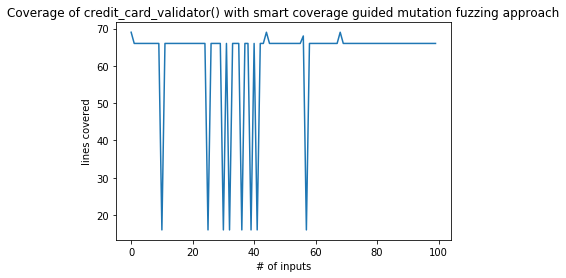

In [42]:
# Plot for smart coverage guided fuzzing approach- program 2

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(cumulative_coverage)
plt.title('Coverage of credit_card_validator() with smart coverage guided mutation fuzzing approach')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')

## Program 2- Comparison of different fuzzing approaches

###### We have Calculated code coverage using Random Fuzzer, Mutation Fuzzer and Smart Coverage Guided Fuzzer

1. We have plot the graph based upon the coverage which we calculated for credi card validator code using random approach and based on the number inputs we have found that code coverage is quite constant during all trials.

2. To have better results we have implemented the mutation fuzzer on our current program and the graph shows us that for very few inputs we are able to get the coverage which is near to the coverage which we are getting in all trials in random fuzzer.

3. Our last approach is to test our program using Smart Coverage guided fuzzer and the results gives us a better coverage in comparision to the mutation fuzzing approach but if we compare the results of all three approaches which we have implemented for this program Rnadom fuzzer outstands these other two approaches.

# Program 2- RSA algorithm for Encryption and Decryption

#### Description: 

+ RSA algorithm is asymmetric cryptography algorithm. Asymmetric actually means that it works on two different keys i.e. Public Key and Private Key. This program is a simple implementation of RSA algorithm to encrypt and decrypt a message.

#### Input: The program takes 1 input- 

+ A string value 

#### Output: 

+ Encrypted values and checks if the decryption of the encrypted message is equal to the original input message

#### Metrics:

+ SLOC- 63
+ Comments- 13
+ McCabe- 14

In [43]:

import random
max_PrimLength = 1000000000000

'''
calculates the modular inverse from e and phi
'''
def egcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = egcd(b % a, a)
        return (g, x - (b // a) * y, y)

'''
calculates the gcd of two ints
'''
def gcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a

'''
checks if a number is a prime
'''
def is_prime(num):
    if num == 2:
        return True
    if num < 2 or num % 2 == 0:
        return False
    for n in range(3, int(num**0.5)+2, 2):
        if num % n == 0:
            return False
    return True

def generateRandomPrim():
    while(1):
        ranPrime = random.randint(0,max_PrimLength)
        if is_prime(ranPrime):
            return ranPrime

def generate_keyPairs():
    p = generateRandomPrim()
    q = generateRandomPrim()
    
    n = p*q
    print("n ",n)
    '''phi(n) = phi(p)*phi(q)'''
    phi = (p-1) * (q-1) 
    print("phi ",phi)
    
    '''choose e coprime to n and 1 > e > phi'''    
    e = random.randint(1, phi)
    g = gcd(e,phi)
    while g != 1:
        e = random.randint(1, phi)
        g = gcd(e, phi)
        
    print("e=",e," ","phi=",phi)
    '''d[1] = modular inverse of e and phi'''
    d = egcd(e, phi)[1]
    
    '''make sure d is positive'''
    d = d % phi
    if(d < 0):
        d += phi
        
    return ((e,n),(d,n))
        
def decrypt(ctext,private_key):
    try:
        key,n = private_key
        text = [chr(pow(char,key,n)) for char in ctext]
        return "".join(text)
    except TypeError as e:
        print(e)

def encrypt(text,public_key):
    key,n = public_key
    ctext = [pow(ord(char),key,n) for char in text]
    return ctext

def rsa(message):
    public_key,private_key = generate_keyPairs() 
    print("Public: ",public_key)
    print("Private: ",private_key)
    
    ctext = encrypt(message,public_key)
    print("encrypted  =",ctext)
    plaintext = decrypt(ctext, private_key)
    print("decrypted =",plaintext,"\n")
    
    if message==plaintext:
        return True
    return False

In [44]:
rsa("7(715!13*):<=;2?)*::67';\"?,=4!9+/-./=6;,;.87/1=0:1%#14=./.(?<?=5%#1'23,&,#5- 9)3!. 8+7>36=<+&/&*)*<*)%/8;=!784( '/8!:427?;/- 7<.")

n  110518431982191976136497
phi  110518431981120136710756
e= 76859794995877203849521   phi= 110518431981120136710756
Public:  (76859794995877203849521, 110518431982191976136497)
Private:  (87390036131342397660881, 110518431982191976136497)
encrypted  = [7297437433270423470961, 56276233175675182799685, 7297437433270423470961, 103393182630234710098412, 59401670024681754757170, 50183669298923682390467, 103393182630234710098412, 102093243282603466225949, 3257662090986134598430, 16852202167470702909409, 92207173086082673010615, 12995151210177249486094, 65591201224478368758915, 91417708318810800004853, 46275006698902147318100, 1945604572234257469716, 16852202167470702909409, 3257662090986134598430, 92207173086082673010615, 92207173086082673010615, 31872615232488071188736, 7297437433270423470961, 91296634338709479018918, 91417708318810800004853, 28181438224507483791300, 1945604572234257469716, 101494968421811332576893, 65591201224478368758915, 36195052194291618142631, 50183669298923682390467,

True

In [45]:
def pure_random_rsa_fuzz(min_length=10, max_length=100,
                 char_start=32, char_range=32):    
    string_length = random.randrange(min_length, max_length + 1)
    out = ""
    for i in range(0, string_length):
        out += chr(random.randrange(char_start, char_start + char_range))
    return out

In [46]:
pure_random_rsa_fuzz()

'#8\'%(;1*%!6 $--783-*#),>+"<(?(<%9\'4*,12$8-)\'+&;,/%#>"29*=46.-+0+),$3+(45-6><284;/'

In [47]:
# frequency of valid inputs for random fuzzing approach- program 3

valid_inputs = set()
trials = 100

for i in range(trials):
    inp = pure_random_rsa_fuzz()
    #print ("input is " + inp)
    if rsa(inp):
        valid_inputs.add(inp) 

len(valid_inputs) / trials

n  229553739028650620026837
phi  229553739027692373779680
e= 52633462785855813915839   phi= 229553739027692373779680
Public:  (52633462785855813915839, 229553739028650620026837)
Private:  (162622190658076038802079, 229553739028650620026837)
encrypted  = [34924271813077315053348, 68351414868519836304255, 105936664878241885051724, 112755944120389623381197, 13056875409180307024333, 16206208195624671858894, 67045361622793765191263, 139851761957845028931623, 115469030178881899244194, 16206208195624671858894, 69484011909833915715757, 16206208195624671858894, 156472204357684684124295, 193349171989661406003880, 154198602037326489974643, 34924271813077315053348, 67045361622793765191263, 77297537612482957526155, 16206208195624671858894, 19204950479966492713583]
decrypted = 0#.,+%&>-%7%2(<0&)%1 

n  59006271094816157641561
phi  59006271094231742916624
e= 45140065513439019505   phi= 59006271094231742916624
Public:  (45140065513439019505, 59006271094816157641561)
Private:  (25957887802818689900497,

n  132366964905017610354647
phi  132366964904111673232080
e= 108261840404805411603439   phi= 132366964904111673232080
Public:  (108261840404805411603439, 132366964905017610354647)
Private:  (15172960181110170245839, 132366964905017610354647)
encrypted  = [94969614924391512107873, 79185182648554164636543, 36560312402753872248745, 23191363901109450481582, 36560312402753872248745, 126411015565838003294763, 90479117159474691772079, 93869958230018030374538, 36560312402753872248745, 93869958230018030374538, 14194163214161452233647, 79185182648554164636543, 26609021360031042524679, 107635954627301860296770, 36742787122022589272277, 83676470098188151529582, 23191363901109450481582, 48045688716326016466414, 80767076579627040756161, 72556968695304909321489, 26733872631675246924822, 118978332705938734887177, 14194163214161452233647, 83676470098188151529582, 42314484879986200297634, 100167307260036384163984, 118978332705938734887177, 33582555366789014209942, 79185182648554164636543, 36742787122022

n  470371767492640318402007
phi  470371767491265465722040
e= 101490704462597832989557   phi= 470371767491265465722040
Public:  (101490704462597832989557, 470371767492640318402007)
Private:  (197280296980246702364773, 470371767492640318402007)
encrypted  = [338847966064328648889150, 284300226396790652354748, 145576670295622527879594, 310533874122584627086855, 136711836353113454608497, 74234160282944962942407, 364964282453353366470998, 241444503815689870144731, 232082259106538953351466, 138181201726189496214288, 218533390018289372094924, 407247886273361144436525, 54723380424704852962481, 145576670295622527879594, 338847966064328648889150, 101951068647913045796005, 74234160282944962942407, 74234160282944962942407, 275709325508717631408517, 310533874122584627086855, 118994056709477235451112, 218533390018289372094924, 237564410993939329462234, 146575833380969891423812, 218533390018289372094924, 364964282453353366470998, 194812184264435520879882, 334586375181615110315169, 3016883881967586382

n  45060876062848577616623
phi  45060876062372232033408
e= 3369692042053853348047   phi= 45060876062372232033408
Public:  (3369692042053853348047, 45060876062848577616623)
Private:  (33742494731296863289519, 45060876062848577616623)
encrypted  = [1510579374981506565347, 29393580692257680497441, 34112246009526184991527, 34112246009526184991527, 18088871511415278851372, 2351547828999498118983, 2471269366392559285221, 44476028387415060830050, 18088871511415278851372, 1510579374981506565347, 9618651964894194045695, 26326435284782248973304, 1510579374981506565347, 27193706702281665482158, 27193706702281665482158, 7240394980521969122031]
decrypted = 2:&& 6;9 2%*244$ 

n  714215626571867788566061
phi  714215626570164734109952
e= 282799897771533881109155   phi= 714215626570164734109952
Public:  (282799897771533881109155, 714215626571867788566061)
Private:  (701803775965818371327243, 714215626571867788566061)
encrypted  = [203345263799786176059096, 434881554040865665401823, 52646720571549478088

n  5801892493098440058497
phi  5801892492128588222640
e= 5214880178127834227009   phi= 5801892492128588222640
Public:  (5214880178127834227009, 5801892493098440058497)
Private:  (4532322301900093077809, 5801892493098440058497)
encrypted  = [3715211520074496280293, 3968870423564737458636, 5087184751733890054204, 1289129120406710301863, 4719655772362630026402, 4017261496590290850900, 5650761270428517170473, 198515797353745484981, 5167925177582840342529, 3932863523716439106408, 2873568422016628618900, 391767646487287853734, 5642453919995093518741, 1245008418401620681335, 652492597461010977715, 4798082200646098275654, 3715211520074496280293, 3932863523716439106408, 988062685565353267295, 2431259013656201318268, 1289129120406710301863, 988062685565353267295, 5087184751733890054204, 1245008418401620681335, 5404149391244168290755, 3715211520074496280293, 5404149391244168290755, 5642453919995093518741, 198515797353745484981, 240835729406862755537, 1363319589769006359322, 3715211520074496280293

n  478723178084106607608137
phi  478723178082673822662096
e= 133461308708562210750893   phi= 478723178082673822662096
Public:  (133461308708562210750893, 478723178084106607608137)
Private:  (320912487542401365212165, 478723178084106607608137)
encrypted  = [392507120298053253398870, 449657712296262513904394, 240417552348612465488391, 293055138375969734912839, 478619344569870553673764, 240417552348612465488391, 419318754086847447027804, 465969640079285689457946, 436570594256523040882525, 335849047699040410171051, 348501198442587617104840, 189537174500147777295222, 419318754086847447027804, 258557949151679793104722, 184620991686406219308027, 64030665440878342735742, 478619344569870553673764, 276879249601239611218120, 465969640079285689457946, 16538579238914551685621, 331542211002529718300006, 449657712296262513904394, 433082731275109308869509, 64030665440878342735742]
decrypted = 74":>"!)/15,!+?(>&)'*4%( 

n  254971048172244136792363
phi  254971048171189307698840
e= 1757529235172520666249

n  213072800216480742726911
phi  213072800215414152850752
e= 198730645555720134407435   phi= 213072800215414152850752
Public:  (198730645555720134407435, 213072800216480742726911)
Private:  (50615235125391409764323, 213072800216480742726911)
encrypted  = [137867397333306408915678, 183359165520864372726682, 194502434785899003662676, 2375551120472875907861, 2375551120472875907861, 9192954779177507279230, 64812316045929859385369, 137867397333306408915678, 97471495382337165586230, 206897385356751213099230, 114938929999019705400599, 9195550170092504357484, 137867397333306408915678, 21840218180424864398699, 183359165520864372726682, 105571349450252561881017, 50212119508511617349266, 183359165520864372726682, 142155948405246191790718, 9195550170092504357484, 9195550170092504357484, 9195550170092504357484, 89835899140929525612913, 57352025026931984094351, 89835899140929525612913, 200555179258591617613189, 105571349450252561881017, 89835899140929525612913, 108625740049976123880977, 200555179258

n  291822468928169785149083
phi  291822468927013189717968
e= 169749396145682490943475   phi= 291822468927013189717968
Public:  (169749396145682490943475, 291822468928169785149083)
Private:  (226631849074648787194427, 291822468928169785149083)
encrypted  = [137941806271695833035821, 8553019817354386467390, 47320224666000714126102, 201967232113688490179615, 228418424369615842891981, 250241847605945905088549, 137941806271695833035821, 170233598039005948066276, 250241847605945905088549, 59757646474931789893732, 93306572736255817353026, 201967232113688490179615, 26614639146006613831526]
decrypted = 1:?"8;15;),"0 

n  161786097274393878134753
phi  161786097273589216107540
e= 40313580979682305407913   phi= 161786097273589216107540
Public:  (40313580979682305407913, 161786097274393878134753)
Private:  (88931511200282227713997, 161786097274393878134753)
encrypted  = [11592613096242114531794, 124289855904578973289726, 147785559879425868160376, 108891003593264495468862, 116668539447267946701553, 

n  226840665602741048701237
phi  226840665601746747788076
e= 135141563636170773294185   phi= 226840665601746747788076
Public:  (135141563636170773294185, 226840665602741048701237)
Private:  (79386873234204657336389, 226840665602741048701237)
encrypted  = [125847573809461597498547, 188983107651948436612061, 49355819408242494779162, 52269214302370626448970, 52269214302370626448970, 104062626899829665273234, 117644500730919011674486, 195515526479112588190225, 190697194398708386773694, 146105074780067276832373, 190080707864934641108694, 216051585938437027945778, 144972534926722433310888, 25198367497604006887036, 10061719217538570543495, 190080707864934641108694, 190697194398708386773694, 190080707864934641108694, 216051585938437027945778, 21201538193139413717901, 10061719217538570543495, 190080707864934641108694, 195136011745660712867848, 52269214302370626448970, 74917511207004891938224, 10061719217538570543495, 169448555055067177674947, 181086027439974024478865, 169448555055067177674947, 

n  86849191347223845377657
phi  86849191346633946162276
e= 86306488496414305937053   phi= 86849191346633946162276
Public:  (86306488496414305937053, 86849191347223845377657)
Private:  (40628931575086518186505, 86849191347223845377657)
encrypted  = [53952946531507095173362, 58358967070607494401781, 78201588442687051786891, 57553924065532651516206, 83412223865584614155639, 54879857231531460032830, 64646464969821332346946, 83803399159645995971643, 53952946531507095173362, 1326187284777294569053, 27717330340681394085091, 26301337911946912111137]
decrypted = 31%?&+(53" 7 

n  27779093588366053447853
phi  27779093587456663919520
e= 4005010744392901987277   phi= 27779093587456663919520
Public:  (4005010744392901987277, 27779093588366053447853)
Private:  (26234875214684181127013, 27779093588366053447853)
encrypted  = [10466856695636254463448, 18012586586435418357206, 4767645604659813898873, 1021903546646748829711, 27267265551666217704112, 14831559023506564810521, 14831559023506564810521, 26258

n  36804322739829332493391
phi  36804322739410488647712
e= 2359482147817338286939   phi= 36804322739410488647712
Public:  (2359482147817338286939, 36804322739829332493391)
Private:  (27173510954480676298003, 36804322739829332493391)
encrypted  = [20375130720657558645922, 15556594097073344903628, 8389734795588035945486, 19551747965810273319815, 19024054665336408958618, 28044037252702484179965, 35361079636808390918586, 16149777751724522525433, 34586976055329766967192, 3762565782269641679560, 24350757258662302906557, 14248830969161455408353, 5033181370168587527856, 7066332704058226687322, 35361079636808390918586, 19024054665336408958618, 5926659294953382880191, 9550065563658710735069, 34105858838533070082821, 16149777751724522525433, 3762565782269641679560, 2840416963298505871863, 17209841958330430283128, 28044037252702484179965, 6437265073991777722153, 27215301114835407757287, 4756941723475517812239, 7394396297541147672026, 16149777751724522525433, 20210413548632977012172, 20241898183006

n  155066214911964823125011
phi  155066214910893905317224
e= 113457334756778202723983   phi= 155066214910893905317224
Public:  (113457334756778202723983, 155066214911964823125011)
Private:  (21225612033341781028199, 155066214911964823125011)
encrypted  = [72703346648066687872794, 3496107036447114022271, 71665848003603476234917, 3496107036447114022271, 80983861499181432631381, 85436748169985351130896, 153960149787325215353585, 62564834766852874601526, 134059214807933221542806, 104622856526764734568024, 80722829153510077377259, 62564834766852874601526, 7119820941247297225701, 65056279286949716613634]
decrypted = #.1.&3*75$47?! 

n  92349386159151505390361
phi  92349386158282192649652
e= 41209129282717001492035   phi= 92349386158282192649652
Public:  (41209129282717001492035, 92349386159151505390361)
Private:  (26887556455398701300767, 92349386159151505390361)
encrypted  = [5262468448212472566505, 34343714902749940986994, 34343714902749940986994, 35302880069723434525936, 65661880808251257

n  496912456850448342734477
phi  496912456849025240014560
e= 453348943220508592594103   phi= 496912456849025240014560
Public:  (453348943220508592594103, 496912456850448342734477)
Private:  (208497903631278578551367, 496912456850448342734477)
encrypted  = [193616701258346306556889, 119393736549286559774186, 21601028052973652785767, 173684632118076995904720, 401579180990839372115882, 21601028052973652785767, 98460166915038763636817, 193616701258346306556889, 98460166915038763636817, 285713810843571575948237, 409008573165986347267426, 158537700738174595903814, 21601028052973652785767, 316269577597390058514676, 316269577597390058514676, 119393736549286559774186, 316269577597390058514676, 436303795446686223959531, 173684632118076995904720, 354825824916369043086182, 158537700738174595903814, 158537700738174595903814, 119393736549286559774186, 101795983098559409264909, 101795983098559409264909, 384348817431474305039911, 138882857788302487769667, 224601996543656855956934, 38434881743147430503

n  776229415576268678754739
phi  776229415574506596695880
e= 550749790535424792185057   phi= 776229415574506596695880
Public:  (550749790535424792185057, 776229415576268678754739)
Private:  (773246910743063504907833, 776229415576268678754739)
encrypted  = [772924308035245544628484, 268011574638446853951050, 285171095906179733613874, 410086688474027173184917, 611493702724786458979791, 268011574638446853951050, 355761896012491229504148, 455520469229137790177852, 410086688474027173184917, 93613993394109276698196, 611493702724786458979791, 610530216777794213329063, 455522378320676724319671, 455522378320676724319671, 610530216777794213329063, 410086688474027173184917, 503068212205108176190513, 772022269024041561558542, 93613993394109276698196, 772924308035245544628484, 268011574638446853951050, 500659949834688482847756, 117219882610198378328398, 268011574638446853951050, 530535780194361153344978, 45979952441629731844717, 430927158507738369641892, 355761896012491229504148, 610530216777794213

n  620927216318024906970787
phi  620927216316418006377360
e= 436756753954524424550017   phi= 620927216316418006377360
Public:  (436756753954524424550017, 620927216318024906970787)
Private:  (273008818380327608830993, 620927216318024906970787)
encrypted  = [349576171817247710454928, 310050233418591460780434, 466405617329465711228009, 98634888624441713319882, 319984944269506654320386, 29243388487499980668020, 588828800301592477004140, 569028889714498978979655, 98634888624441713319882, 588828800301592477004140, 153570555705055627119183, 527159048598635239364252, 466405617329465711228009, 330643454428771707283153, 540580164652933262492001, 309820660415637913479337, 349576171817247710454928, 216936300298386506815358, 310050233418591460780434, 216936300298386506815358, 365233723498681747305804, 319984944269506654320386, 110058321509984321269238, 167235013344035057923086, 330643454428771707283153, 333808155672457216235749, 525328594278001694551830, 527159048598635239364252, 216936300298386506

n  6725769837175448090567
phi  6725769836911786416360
e= 1556182249360616523467   phi= 6725769836911786416360
Public:  (1556182249360616523467, 6725769837175448090567)
Private:  (5243593592445933185963, 6725769837175448090567)
encrypted  = [1109160482458235750060, 4362356900401478549348, 4642136311612292423680, 4642136311612292423680, 4557640591620263757362, 1259356372987380641822, 343718501572502859300, 343718501572502859300, 1435075828690825266524, 5580820893558792995089, 675399844149935038421, 2657446736788115363365, 2174407768490682186969, 2302585247485702138679, 2563855018862890230098, 4557640591620263757362, 2005497004342148852107, 2563855018862890230098, 4557640591620263757362, 51501959258190873684, 4955895428908778469676, 1121907487091678778570, 2005497004342148852107, 1435075828690825266524]
decrypted = 0>!!."''8%-69?(.&(.:/7&8 

n  59721235076069349762137
phi  59721235075566653965056
e= 15198666094166093071489   phi= 59721235075566653965056
Public:  (15198666094166093071489, 

n  130116247747778289111523
phi  130116247746655261374360
e= 71430110639233311377189   phi= 130116247746655261374360
Public:  (71430110639233311377189, 130116247747778289111523)
Private:  (127549974347052964679309, 130116247747778289111523)
encrypted  = [124890055949069969606838, 116612123143938582618178, 17103669675790115600982, 52255767874180974260215, 2374191472795659024964, 95914839501347259731453, 68497940639765822431291, 124890055949069969606838, 74453267476243770562886, 73663256703236158641858, 17103669675790115600982, 8643387880232490707787, 107495486712399555119910, 44426873579329105390866, 107959317528419573146549, 17103669675790115600982, 107959317528419573146549, 126419297513851469693870, 32687139322221910103435, 3296224252501338620584, 126419297513851469693870, 32687139322221910103435, 116612123143938582618178, 107959317528419573146549, 109041423826402193163900, 100297535529220837354116, 109041423826402193163900, 73663256703236158641858, 73663256703236158641858, 1000092538

1.0

In [48]:
# coverage for random fuzzing approach- program 3

valid_inputs = []

# NOTE: The execution takes a while. So you can change trials=10 for quicker results
#trials=10

trials = 100
cumulative_coverage=[]

for i in range(trials):
    input_rsa_message= pure_random_rsa_fuzz()
    coverage=calculate_coverage_1_input(input_rsa_message, rsa)
    cumulative_coverage.append(coverage)
    if rsa(input_rsa_message):
        valid_inputs.append(input_rsa_message)

cumulative_coverage

n  733638450651729503050921
phi  733638450650001674138452
e= 587466951019346798096889   phi= 733638450650001674138452
Public:  (587466951019346798096889, 733638450651729503050921)
Private:  (660208507929978010930281, 733638450651729503050921)
encrypted  = [316629755452158927531642, 21663558027300614807404, 507602166729944654662518, 334049948005090095527351, 532370479665892494797572, 161162156011596179185596, 408520734434452173373437, 274959259373105965178056, 447387732304759527099319, 91875446539401167957978, 411743579344439682323067, 316629755452158927531642, 168216535082838400231067, 198830139752446548340643, 316629755452158927531642, 532370479665892494797572, 532370479665892494797572, 489605011972625040138502, 719404563156792710685119, 9119785407840961664227, 161162156011596179185596, 411743579344439682323067, 532370479665892494797572, 138100121522820709743264, 442445888482495423442994, 215575329666021683214488, 138100121522820709743264, 316629755452158927531642, 7105261040436798244

n  432423646763410904719079
phi  432423646762095653102280
e= 347062483308961815147413   phi= 432423646762095653102280
Public:  (347062483308961815147413, 432423646763410904719079)
Private:  (265437165799531538119637, 432423646763410904719079)
encrypted  = [291254780105613579374406, 100612497910693979718271, 325682696519772601111685, 313613793185034757487667, 313613793185034757487667, 120043456512317727277949, 166687509181302758169758, 240338514953310594507657, 100612497910693979718271, 165947675185565439382858, 322936285311917785143693, 192524446616690172329360, 165947675185565439382858, 195635127738402169337272, 400822345051175881764398, 431709831275067141008872, 210641497758412961060046, 400822345051175881764398, 417636062670543424905778, 192524446616690172329360, 195635127738402169337272, 192524446616690172329360, 312112092637185444186719, 431709831275067141008872, 322936285311917785143693, 120043456512317727277949, 416228426222300745926198, 166687509181302758169758, 313613793185034

n  142159099180291711821869
phi  142159099179535535336160
e= 41584641437955097629013   phi= 142159099179535535336160
Public:  (41584641437955097629013, 142159099180291711821869)
Private:  (78404991004293534435037, 142159099180291711821869)
encrypted  = [114796135828545652061391, 58325171215501834775188, 90697561993280150673424, 65185905817537187211681, 90697561993280150673424, 124736111496437272805381, 140569501476575579283830, 124891703372946147404248, 86793502962632427159539, 116008661495289374149517, 65185905817537187211681, 107798717541513657383177, 61292496814738350012114, 105404816423180695925522, 140569501476575579283830, 32295912062079777062335, 40243401123438205655514, 1527353169324909105618, 65185905817537187211681, 110285610407445595295010, 40243401123438205655514, 86793502962632427159539, 107798717541513657383177, 58325171215501834775188, 107798717541513657383177, 1527353169324909105618, 75760674777374054058107, 110285610407445595295010, 116008661495289374149517, 5832517121

[98, 100, 98, 98, 100]

Text(0, 0.5, 'lines covered')

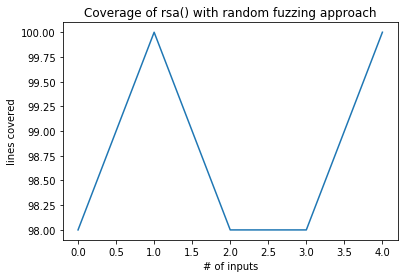

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(cumulative_coverage)
plt.title('Coverage of rsa() with random fuzzing approach')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')

## Mutation Fuzzer for RSA Algorithm program

In [50]:
class RSA_Fuzzer:
    # the code mutates the input by randomly adding a character
    def add_random_char(s):
        pos = random.randint(0, len(s) - 1)
        random_character = chr(random.randrange(32, 127))
        return s[:pos] + random_character + s[pos:]
    
    def delete_random_char(s):
        if s == "":
            return s
        pos = random.randint(0, len(s) - 1)
        return s[:pos] + s[pos+1:]
    
    def flip_random_character(s):
        """Returns s with a random bit flipped in a random position"""
        if s == "":
            return s

        pos = random.randint(0, len(s) - 1)
        c = s[pos]
        bit = 1 << random.randint(0, 6)
        new_c = chr(ord(c) ^ bit)
        # print("Flipping", bit, "in", repr(c) + ", giving", repr(new_c))
        return s[:pos] + new_c + s[pos + 1:]
        
    def fuzz_rsa(s):
        mutators = [RSA_Fuzzer.add_random_char, RSA_Fuzzer.delete_random_char, RSA_Fuzzer.flip_random_character]
        mutator = mutators[random.randint(0, 2)]
        return mutator(s)


In [51]:
# frequency of valid inputs for mutation fuzzing approach- program 3

valid_inputs = []
trials = 100

for i in range(trials):
    input_rsa_message = RSA_Fuzzer.fuzz_rsa("Hello World")
    print("Input Message is "+str(input_rsa_message)+ "\n")
    if rsa(input_rsa_message):
        valid_inputs.append(input_rsa_message) 

print(valid_inputs)
len(valid_inputs) / trials


Input Message is Hello Wosrld

n  9685824417062912273677
phi  9685824416642798298556
e= 1764647276631423960327   phi= 9685824416642798298556
Public:  (1764647276631423960327, 9685824417062912273677)
Private:  (1659555115981704442595, 9685824417062912273677)
encrypted  = [2917856577098714519152, 2181426670507851880108, 9282759107122638249661, 9282759107122638249661, 8422652566852312887633, 4459219357587524168591, 5981478103581579569634, 8422652566852312887633, 7215956829492943067632, 2168587919658071468667, 9282759107122638249661, 6847198146819049295559]
decrypted = Hello Wosrld 

Input Message is Hello/ World

n  430032119530126056110257
phi  430032119528752451300340
e= 129486968944870257425279   phi= 430032119528752451300340
Public:  (129486968944870257425279, 430032119530126056110257)
Private:  (295426262661121673643119, 430032119530126056110257)
encrypted  = [28708128481533838095181, 248336713505423558579752, 52788846294402026540793, 52788846294402026540793, 252181586803537749590674

n  230014792589411033215279
phi  230014792588252276317040
e= 40629889319865427710951   phi= 230014792588252276317040
Public:  (40629889319865427710951, 230014792589411033215279)
Private:  (42689882496440081433991, 230014792589411033215279)
encrypted  = [139676340535846947622084, 219663415879159548368979, 114381861186887722455593, 114381861186887722455593, 185218199782584903145929, 70825690198584512982903, 19405553770002213883053, 15473621778714124210519, 185218199782584903145929, 10879335650111426191431, 114381861186887722455593, 51621141975584767817304]
decrypted = Hellou World 

Input Message is Hello$World

n  391482527847467606346257
phi  391482527846209927388196
e= 146297691613335699073811   phi= 391482527846209927388196
Public:  (146297691613335699073811, 391482527847467606346257)
Private:  (184928487499578664421783, 391482527847467606346257)
encrypted  = [8251373437020440215598, 9164090719460520086532, 140401795074021976046554, 140401795074021976046554, 343015530836376101177821,

n  190870810532043856925173
phi  190870810531062739849440
e= 171887673646061938355107   phi= 190870810531062739849440
Public:  (171887673646061938355107, 190870810532043856925173)
Private:  (152142076371693139551403, 190870810532043856925173)
encrypted  = [2078450586638354734124, 109937271823025750073745, 80845651622039934445116, 80845651622039934445116, 139064945410308956835712, 135422543081768615871674, 172871938511523611482459, 135404262786904846439210, 139064945410308956835712, 120075150275816085748897, 80845651622039934445116, 26706810658723607272521]
decrypted = Hello$ World 

Input Message is Hello orld

n  42040749457280298681017
phi  42040749456571360602240
e= 19420946297168746921453   phi= 42040749456571360602240
Public:  (19420946297168746921453, 42040749457280298681017)
Private:  (36917256638351833801957, 42040749457280298681017)
encrypted  = [34741589198427365654197, 27219198357402744523236, 29107241190357148433240, 29107241190357148433240, 10212949127832374288333, 3313626

n  39608356238100767549297
phi  39608356237565182264560
e= 37153333622209812369257   phi= 39608356237565182264560
Public:  (37153333622209812369257, 39608356238100767549297)
Private:  (18511973874147874964633, 39608356238100767549297)
encrypted  = [34195167749206385543722, 31398614368773884376837, 27263565933529334129515, 27263565933529334129515, 32426695003123965893329, 28043329334189785326494, 41993998942021370267, 32426695003123965893329, 982692166861273721703, 27263565933529334129515, 24992205005026231342539]
decrypted = Hello Wosld 

Input Message is ello World

n  3214878969838303739659
phi  3214878969577581141040
e= 2008841344747715921137   phi= 3214878969577581141040
Public:  (2008841344747715921137, 3214878969838303739659)
Private:  (2261627421339492146033, 3214878969838303739659)
encrypted  = [208108265886440666722, 2014686909885141768058, 2014686909885141768058, 2123341403400938492725, 673133847392385739738, 738090366687941692296, 2123341403400938492725, 31988307624727394414

n  742794496256630898610301
phi  742794496254905817081372
e= 695936381404685287018223   phi= 742794496254905817081372
Public:  (695936381404685287018223, 742794496256630898610301)
Private:  (492969669007207826954063, 742794496256630898610301)
encrypted  = [621202535595125982976721, 488198295510235655162847, 488198295510235655162847, 226341401008077447297966, 678745320623878918632947, 609579315424957056145342, 226341401008077447297966, 257706421901600778532202, 488198295510235655162847, 232662030303867762638705]
decrypted = Hllo World 

Input Message is HEllo World

n  304915646133518227971167
phi  304915646132284386743040
e= 9634543657901291927443   phi= 304915646132284386743040
Public:  (9634543657901291927443, 304915646133518227971167)
Private:  (57250536704244100481947, 304915646133518227971167)
encrypted  = [157143104981135180693050, 54792283487398884099657, 133328829218856846432126, 133328829218856846432126, 193066773186887349255956, 213322375090230099806459, 113323215368898719752

n  522376461386365918521037
phi  522376461384879002029596
e= 271555429257102841063537   phi= 522376461384879002029596
Public:  (271555429257102841063537, 522376461386365918521037)
Private:  (181283603360101953273133, 522376461386365918521037)
encrypted  = [448561742184348359201480, 345975494873724804220963, 105023947124218889282868, 297880063370791525567423, 297880063370791525567423, 172686834286650694032444, 277188586825027899411634, 62240474248425692436055, 172686834286650694032444, 187294574129213850130035, 297880063370791525567423, 166069652822770784120676]
decrypted = H<ello World 

Input Message is Hell World

n  496392875047331697062489
phi  496392875045911574469540
e= 173340393123831097518107   phi= 496392875045911574469540
Public:  (173340393123831097518107, 496392875047331697062489)
Private:  (434286394032591768184703, 496392875047331697062489)
encrypted  = [343936022403983937399442, 347823762465204215656483, 397301802226927124506468, 397301802226927124506468, 249721589825096

n  153847223366972470497031
phi  153847223366112227457064
e= 28019212326247799337671   phi= 153847223366112227457064
Public:  (28019212326247799337671, 153847223366972470497031)
Private:  (115898907657380017782855, 153847223366972470497031)
encrypted  = [132916115721861026779056, 1317170619771249874252, 15702448346616586753057, 15702448346616586753057, 80399161070251712763172, 131904456399578469459669, 22078141813426015397166, 80399161070251712763172, 112239358674188058429174, 15702448346616586753057, 110710827849425458772273, 35031369018606709858238]
decrypted = Hello Worl?d 

Input Message is #Hello World

n  323588340083076032544757
phi  323588340081919238356800
e= 17899961641203113341711   phi= 323588340081919238356800
Public:  (17899961641203113341711, 323588340083076032544757)
Private:  (29300349184854888177391, 323588340083076032544757)
encrypted  = [29918208564259376525440, 16671239331394446910543, 265228664348431045320359, 262713165407207022348767, 262713165407207022348767, 13

n  418697094301039179682027
phi  418697094299681402412480
e= 378804850288349566294319   phi= 418697094299681402412480
Public:  (378804850288349566294319, 418697094301039179682027)
Private:  (53354427013571403925199, 418697094301039179682027)
encrypted  = [39461333279919938290820, 110616824725518666329577, 110616824725518666329577, 210066330426675079504528, 259075457928303072239618, 299233920767993342629428, 210066330426675079504528, 328894024139503081016596, 110616824725518666329577, 48314477549035054500826]
decrypted = ello World 

['Hello Wosrld', 'Hello/ World', 'Hello Wnrld', 'Hello Wosld', 'HelJlo World', 'Hello Worgld', 'HelLo World', 'He>llo World', '.Hello World', 'Hello Worl', 'Helln World', 'He7llo World', 'Helho World', 'Hello Wornd', 'Hellou World', 'Hello$World', 'Helo World', 'Hello Worll', 'ello World', 'Hello 9World', 'Helo World', 'Hell9o World', 'Hell4o World', 'Helo World', 'Hello \x17orld', 'ello World', 'HelloB World', 'Hello Wotrld', 'Hello$ World', 'Hello orld', 

1.0

In [ ]:
# coverage for mutation fuzzing approach- program 3

valid_inputs = []
# NOTE: The execution takes a while. So you can change trials=10 for quicker results
#trials=10

trials = 5
cumulative_coverage=[]

for i in range(trials):
    input_credit_card_number = RSA_Fuzzer.fuzz_rsa("Hello World")
    coverage=calculate_coverage_1_input(input_credit_card_number, rsa)
    cumulative_coverage.append(coverage)
    if credit_card_validator(input_credit_card_number):
        valid_inputs.append(input_credit_card_number)

cumulative_coverage

n  372137249081873025520807
phi  372137249080631129713120
e= 149208545565344165363357   phi= 372137249080631129713120
Public:  (149208545565344165363357, 372137249081873025520807)
Private:  (144314683195616103645653, 372137249081873025520807)
encrypted  = [52135692136348100932977, 267732570034541783684131, 184317537484159623731488, 184317537484159623731488, 267732570034541783684131, 272896832794729989591506, 211863753541504977408403, 371512106484536381332539, 272896832794729989591506, 285611679640589723480955, 184317537484159623731488, 193485284002144750271544]
decrypted = Helleo World 

n  195869158293568279070233
phi  195869158292408354338000
e= 139750346933454256521357   phi= 195869158292408354338000
Public:  (139750346933454256521357, 195869158293568279070233)
Private:  (166077259584553289117493, 195869158293568279070233)
encrypted  = [64041725155162409364569, 68623477093222000964776, 91429410053760595439622, 91429410053760595439622, 150120482062927830813769, 1252043543738297180942

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(cumulative_coverage)
plt.title('Coverage of rsa() with mutation fuzzing approach')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')

## Smart Coverage Guided Fuzzer for RSA Algorithm

In [ ]:
from fuzzingbook.Coverage import Coverage

input_rsa_message = RSA_Fuzzer.fuzz_rsa("Hello World!")

with Coverage() as cov:
    rsa(input_rsa_message)
    
[c for c in cov.coverage()]

In [ ]:
seed = {"Hello World"}
calculate_coverage_1_input(seed, rsa)

In [ ]:
trials = 100

#[{'input':{'ip':'','subnet':''},'coverage':''}
cumulative_coverage = []
seed = {"Hello World"}
population= []
max_coverage=0
for i in range(0, trials):
    coverage=calculate_coverage_1_input(seed, rsa)
    #print(seed)
    cumulative_coverage.append(coverage)
    if coverage>max_coverage:
        population.append({'input':seed, 'coverage':coverage})
        max_coverage=coverage
    #check if population is not empty 
    if population:
        #select seed semi randomly- sort and if equal coverage, then select random
        population= sorted(population, key = lambda i: i['coverage'], reverse=True)
        #get all seeds from population with highest coverage
        high_coverage_seeds=population[0]
        if len(population)>1 : 
            new_pop=[d for d in population if d['coverage']==high_coverage_seeds['coverage']]
            #choose random from dic and add to seed
            rand_pop=random.randint(0, len(new_pop) - 1)
            y=''.join(new_pop[rand_pop]['input'])
            seed={RSA_Fuzzer.fuzz_rsa(str(y))} 
        else:
            y=''.join(population[0]['input'])
            seed={RSA_Fuzzer.fuzz_rsa(str(y))} 
print(population)
cumulative_coverage

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(cumulative_coverage)
plt.title('Coverage of rsa() with smart coverage guided mutation fuzzing approach')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')

## Program 2- Comparison of different fuzzing approaches

###### We have Calculated code coverage using Random Fuzzer, Mutation Fuzzer and Smart Coverage Guided Fuzzer

1. We have plot the graph based upon the coverage which we calculated for rsa algorithm for random fuzzer and result shows us that coverage is almost similar for all inputs we used.

2. To compare our results of random fuzzer we have implemented Mutation fuzzer for this program also and results are almost identical to the ones which we obtained in random fuzzer approach

3. Our last approach is to test our program using Smart Coverage guided fuzzer and the results shows us that there is a small decrease in code coverage in this case but overall the results are same in all three methods.